# **Understand data**

## **1. Chuẩn bị dữ liệu**

In [ ]:
# raw data without 2 predict columns
! wget https://github.com/thanggnguyenn/data-for-everything/raw/main/credit_card_churn_20_cols.csv

# raw data on Kaggle
# ! wget https://github.com/thanggnguyenn/data-for-everything/raw/main/credit_card_churn.csv

--2023-04-21 13:45:49--  https://github.com/thanggnguyenn/data-for-everything/raw/main/credit_card_churn_20_cols.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/thanggnguyenn/data-for-everything/main/credit_card_churn_20_cols.csv [following]
--2023-04-21 13:45:49--  https://raw.githubusercontent.com/thanggnguyenn/data-for-everything/main/credit_card_churn_20_cols.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1254688 (1.2M) [text/plain]
Saving to: ‘credit_card_churn_20_cols.csv’

credit_card_churn_2 100%[===================>]   1.20M  --.-KB/s    in 0.06s   

2023-04-21 13:45:50 (20.8 M

## **2. Thư viện**

In [ ]:
!pip install minepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.0/497.0 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for minepy: filename=minepy-1.2.6-cp39-cp39-linux_x86_64.whl size=226928 sha256=b3836dd17546275ad8c73855780406e41a1469446ca53da46735fa043a03c945
  Stored in directory: /root/.cache/pip/wheels/36/71/63/ac6efc0d0f43ad93398a7b25b6ef3b3aacf109e7dc5afe588f
Successfully built minepy


In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

from minepy import MINE
from scipy.spatial import distance
import math
import numpy as np
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency

from sklearn.preprocessing import MinMaxScaler, LabelEncoder

sns.set_style("darkgrid")

## **3. Tải dữ liệu**

In [ ]:
raw_data = pd.read_csv("credit_card_churn.csv",index_col="CLIENTNUM")
raw_data.head()

FileNotFoundError: ignored

In [ ]:
raw_data.shape

Dữ liệu có 10127 dòng và 22 cột.

## **4. Tổng quan về dữ liệu** 

### **Mô tả bộ dữ liệu**

1. `CLIENTNUM`: số định danh khách hàng có tài khoản tại ngân hàng. 

2. `Attrition_Flag`: Hoạt động của khách hàng. Gồm hai giá trị là: Existing Customer (khách hàng đang hoạt động) và Attrited Customer (khách hàng đã ngưng sử dụng dịch vụ). 

3. `Customer_Age`: tuổi của khách hàng. 

4. `Gender`: giới tính 

5. `Dependent_count`: số người phụ thuộc. 

6. `Education_Level`: trình độ học vấn. 

7. `Marital_Status`: tình trạng hôn nhân. 

8. `Income_Category`: phân loại mức thu nhập (gồm có`: dưới \$40K, \$40K – \$60K, \$60K - \$80K, \$80K - \$120K, trên \$129K và không biết). 

9. `Card_Category`: loại thẻ tín dụng (Blue, Silver, Gold, Platinum). 

10. `Months_on_book`: thời gian có giao dịch với ngân hàng. 

11. `Total_Relationship_Count`: số lượng toàn bộ sản phẩm mà khách hàng đã sử dụng. 

12. `Months_Inactive_12_mon`: số tháng không giao dịch trong 12 tháng gần nhất. 

13. `Contacts_Count_12_mon`: số liên lạc trong 12 tháng gần nhất. 

14. `Credit_Limit`: hạn mức tín dụng trên thẻ tín dụng. 

15. `Total_Revolving_Bal`: tổng số dư quay vòng trên thẻ tín dụng.

16. `Avg_Open_To_Buy`: mức hạn tín dụng còn lại (trung bình của 12 tháng gần nhất).

17. `Total_Amt_Chng_Q4_Q1`: thay đổi trong số tiền giao dịch. 

18. `Total_Trans_Amt`: tổng số tiền giao dịch (trong 12 tháng gần nhất). 

19. `Total_Trans_Ct`: tổng số lượng giao dịch (trong 12 tháng gần nhất). 

20. `Total_Ct_Chng_Q4_Q1`: thay đổi trong số lượng giao dịch. 

21. `Avg_Utilization_Ratio`: tỷ lệ sử dụng thẻ trung bình. 

22. `Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1`: mô hình Naïve Bayes dự đoán khách hàng có ngưng sử dụng dịch vụ dựa trên các yếu tố sau. `(không sử dụng cột này). 

23. `Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2`: mô hình Naïve Bayes dự đoán khách hàng có ngưng sử dụng dịch vụ dựa trên các yếu tố sau. `(không sử dụng cột này). 

**Nhận xét:** chúng ta sẽ xóa hai cột 22 và 23 do không sử dụng hai cột này để xây dựng mô hình. 

In [ ]:
data1 = raw_data.drop(columns=\
["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",\
"Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"],\
    )
data1.head()

NameError: ignored

In [ ]:
data1.shape

Sau khi xóa hai cột cuối thì dữ liệu còn 20 thuộc tính.

In [ ]:
# lưu data có 20 cột
# data1.to_csv("credit_card_churn_20_cols.csv")

## **5. Tìm hiểu về dữ liệu**

In [ ]:
data = pd.read_csv("credit_card_churn_20_cols.csv",index_col="CLIENTNUM")
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### a. Kiểu dữ liệu

Dựa vào phần mô tả dữ liệu, nhóm sẽ chia các thuộc tính thành các kiểu dữ liệu phù hợp:

- Các thuộc tính số: `Customer_Age`, `Dependent_count`, `Months_on_book`, `Total_Relationship_Count`, `Months_Inactive_12_mon`, `Contacts_Count_12_mon`, `Credit_Limit`, `Total_Revolving_Bal`, `Avg_Open_To_Buy`, `Total_Amt_Chng_Q4_Q1`, `Total_Trans_Amt`, `Total_Trans_Ct`, `Total_Ct_Chng_Q4_Q1`, `Avg_Utilization_Ratio`.

- Các thuộc tính phân loại: `Attrition_Flag` (cho biết khách hàng có ngưng sử dụng dịch vụ hay không), `Gender`, `Education_Level`, `Marital_Status`, `Income_Category`, `Card_Category`.

In [ ]:
# kiểm tra kiểu dữ liệu của từng cột
data.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

### b. Dữ liệu trùng

In [ ]:
# kiểm tra dữ liệu có bị trùng
data.duplicated().sum()

0

Qua kiểm tra nhóm nhận thấy không có dòng nào bị trùng. 

### c. Dữ liệu thiếu

In [ ]:
data.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

- Không có thuộc tính nào bị thiếu

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  

### d. Mô tả thống kê dữ liệu

#### Các cột dữ liệu dạng số (numerical)

In [ ]:
num_cols = data.select_dtypes(np.number).columns

##### Thuộc tính sô liên tục

In [ ]:
continous_num_cols = [
  'Customer_Age',
  'Credit_Limit',
  'Total_Revolving_Bal',
  'Avg_Open_To_Buy',
  'Total_Amt_Chng_Q4_Q1',
  'Total_Trans_Amt',
  'Total_Trans_Ct',
  'Total_Ct_Chng_Q4_Q1',
  'Avg_Utilization_Ratio'
]

In [ ]:
data[continous_num_cols].describe()

,Customer_Age,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


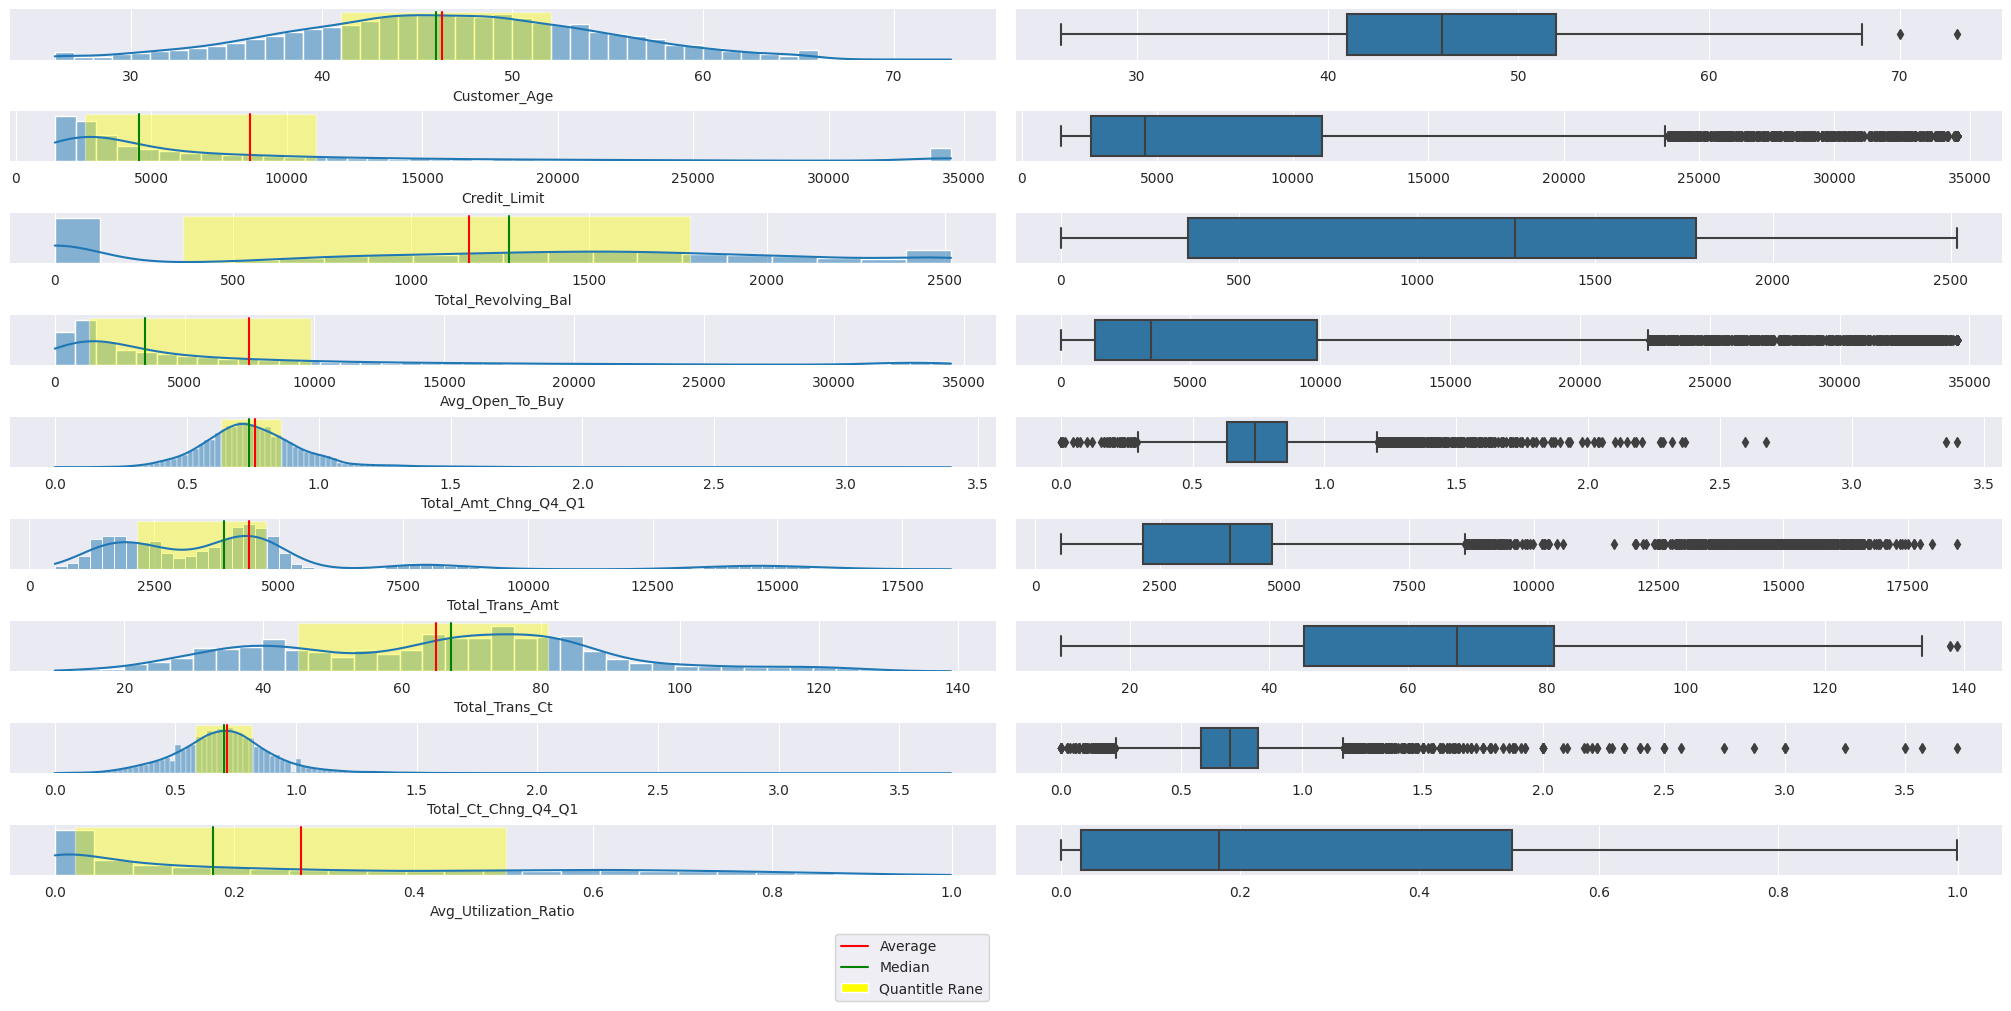

In [ ]:
# PLOT HISTOGRAM
nrows = 10
ncols = 2

fig, axes = plt.subplots(nrows, ncols, layout = 'constrained', figsize = (20, 10))
# fig.tight_layout()

index = 0

for i in range(0, nrows - 1):
  for j in range(0, ncols):
    try:
      name = continous_num_cols[index]
      
      if j == 0:
        # Plot histogram
        sns.histplot(data = data[name], ax = axes[i, j], kde = True, bins = 'auto')
        max_ylim = axes[i, j].get_ylim()[1]

        # Plot average line
        avg = data[name].mean()
        axes[i, j].plot([avg]*2, [0, max_ylim], label = 'Average', color = 'red')

        # Plot median line
        med = data[name].median()
        axes[i, j].plot([med]*2, [0, max_ylim], label = 'Median', color = 'green')

        # Plot IQR
        Q1 = np.percentile(data[name], 25)
        Q3 = np.percentile(data[name], 75)

        IQR = Q3 - Q1

        axes[i, j].add_patch(Rectangle((Q1, 0), 
                                        IQR, 
                                        max_ylim,
                                        alpha = 0.4,
                                        facecolor = 'yellow'))
        axes[i, j].set(ylabel = None)

      else:
        sns.boxplot(x = data[name], ax = axes[i, j])
        axes[i, j].set(xlabel = None, ylabel = None)

      # Annotate
      # axes[i, j].set_title(name)
      axes[i, j].spines['top'].set_visible(False)
      axes[i, j].spines['right'].set_visible(False)
      axes[i, j].spines['bottom'].set_visible(False)
      axes[i, j].spines['left'].set_visible(False)
      axes[i, j].set_yticks([], [])

    except:
      break
  index += 1

# PLOT LEGEND
temp = [0]*2
axes[-1, -2].plot(temp, temp, label = 'Average', color = 'red')
axes[-1, -2].plot(temp, temp, label = 'Median', color = 'green')
axes[-1, -2].add_patch(Rectangle((0, 0), 0, 0, facecolor = 'yellow', label = 'Quantitle Rane'))
axes[-1, -2].legend()
axes[-1, -2].set_xticks([], [])
axes[-1, -2].set_yticks([], [])
axes[-1, -2].axis('off')
axes[-1, -1].axis('off')

plt.savefig("/Phân phối thuộc tính số.png")
plt.show()


- **Nhận xét**:
  - Có 2 thuộc tính có phân phối multiimodal: `Total_Trans_Ct`, `Total_Trans_Amt`.
  - Có 3 thuộc tính có hình dạng gần phân phối chuẩn: `Customer_Age`, `Total_Ct_Chng_Q4_Q1` và `Total_Amt_Chng_Q4_Q1`. [2]
  - Ngoại trừ 3 thuộc tính ở [2] thì còn lại đều có xu hướng bị lệch.
  - Histogram của `Total_Trans_Amt` cho thấy tệp khách hàng chia thành 4 phân khúc khác nhau. Cũng như với thuộc tính `Total_Trans_Ct`.

##### Thuộc tính sô rời rạc

In [ ]:
discrete_num_cols = [
  'Dependent_count',
  'Months_on_book',
  'Total_Relationship_Count',
  'Months_Inactive_12_mon',
  'Contacts_Count_12_mon'
]

In [ ]:
data[discrete_num_cols].describe()

,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,2.346203,35.928409,3.812580,2.341167,2.455317
std,1.298908,7.986416,1.554408,1.010622,1.106225
min,0.000000,13.000000,1.000000,0.000000,0.000000
25%,1.000000,31.000000,3.000000,2.000000,2.000000
50%,2.000000,36.000000,4.000000,2.000000,2.000000
75%,3.000000,40.000000,5.000000,3.000000,3.000000
max,5.000000,56.000000,6.000000,6.000000,6.000000


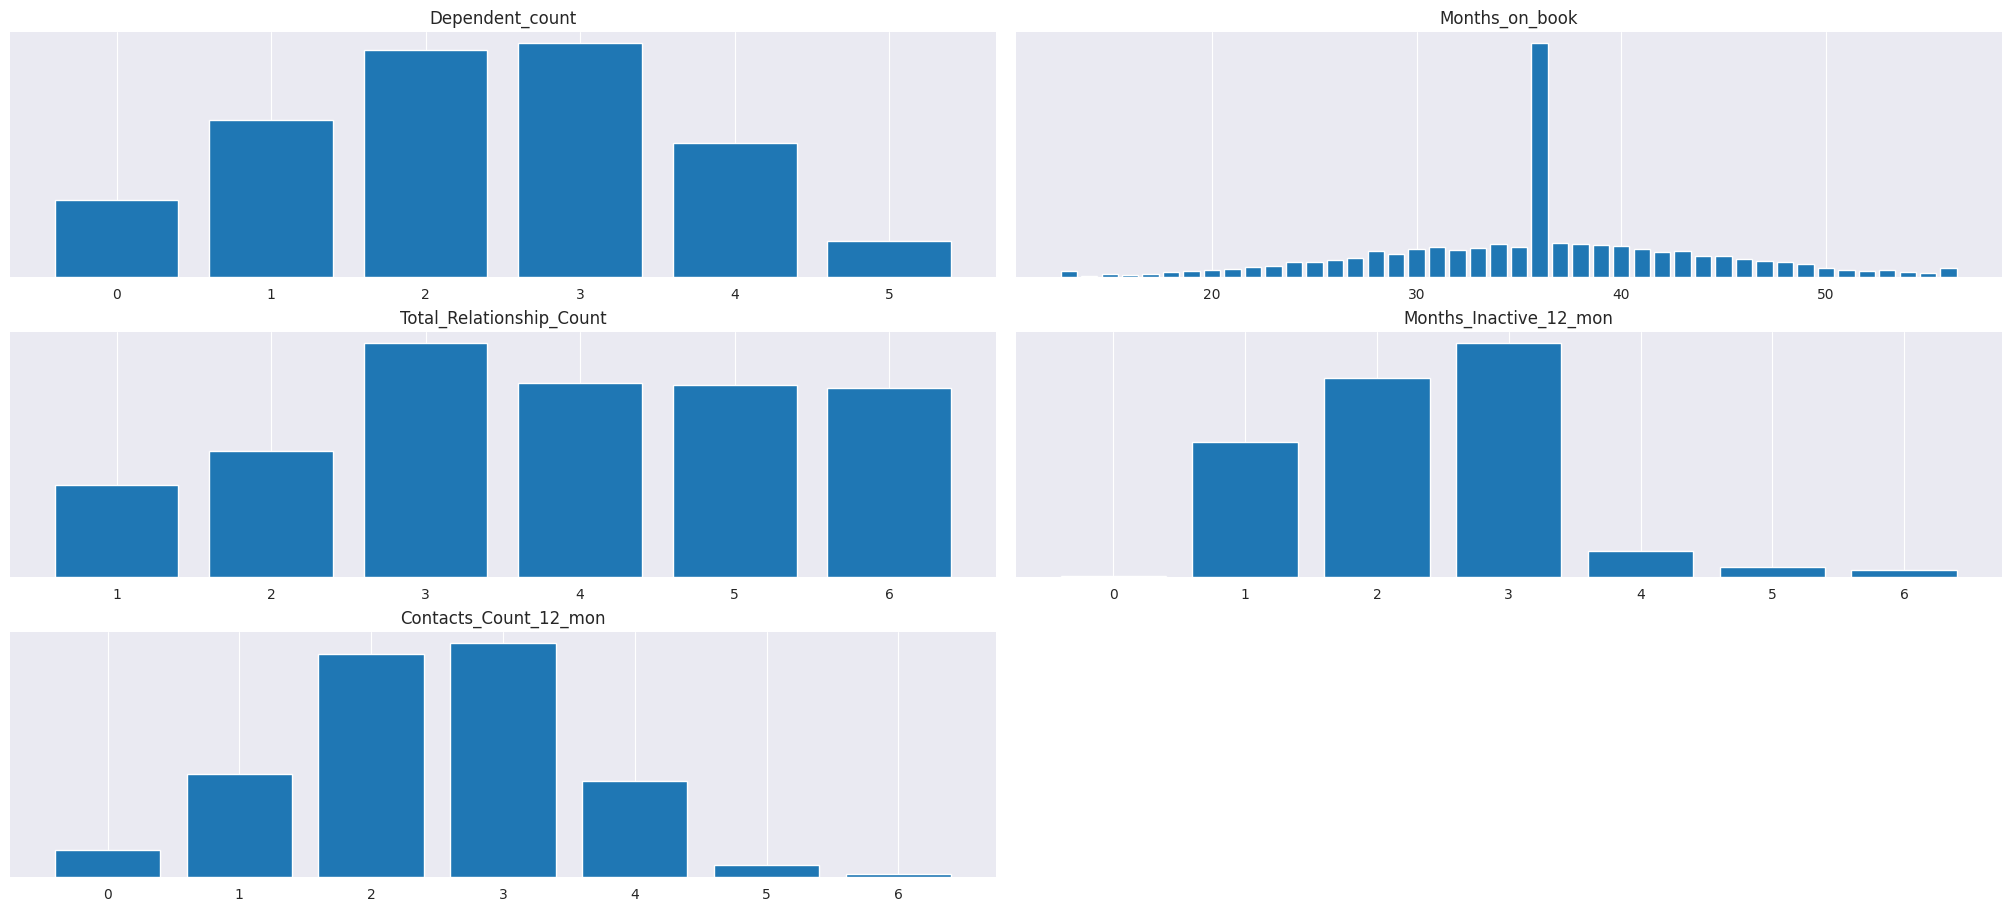

In [ ]:
nrows = 3
ncols = 2

fig, axes = plt.subplots(nrows, ncols, layout = 'constrained', figsize = (20, 9))
# fig.tight_layout()

index = 0

for i in range(0, nrows):
  for j in range(0, ncols):
    try:
      name = discrete_num_cols[index]
      
      # Bar plot
      temp = data[name].value_counts()
      axes[i, j].bar(x = temp.index, height = temp.values)

      # Annotate
      axes[i, j].set_title(name)
      axes[i, j].set(ylabel = None)
      axes[i, j].spines['top'].set_visible(False)
      axes[i, j].spines['right'].set_visible(False)
      axes[i, j].spines['bottom'].set_visible(False)
      axes[i, j].spines['left'].set_visible(False)
      axes[i, j].set_yticks([], [])

      index += 1
    except:
      break
  

axes[-1, -1].axis('off')
plt.savefig("/Phân phối thuộc tính số rời rạc.png")

plt.show()

- **Nhận xét**:
  - Thuộc tính `Months_on_book` có giá trị 36 chiếm đa số hơn so với các giá trị còn lại.
  - Thuộc tính `Months_Inactive_12_mon` có 3 giá trị 1, 2 và 3 xuất hiện nhiều hơn so với các giá trị còn lại.
  - Thuộc tính `Total_Relationship_Count` cho thấy đa phần khách hàng sử dụng từ 3 sản phẩm trở lên của ngân hàng.
  - Thuộc tính `Contacts_Count_12_mon` cho thấy số lượng liên lạc của khách hàng ít (dưới 6 lần).

##### Quan hệ giữa các thuộc tính số với biến Target

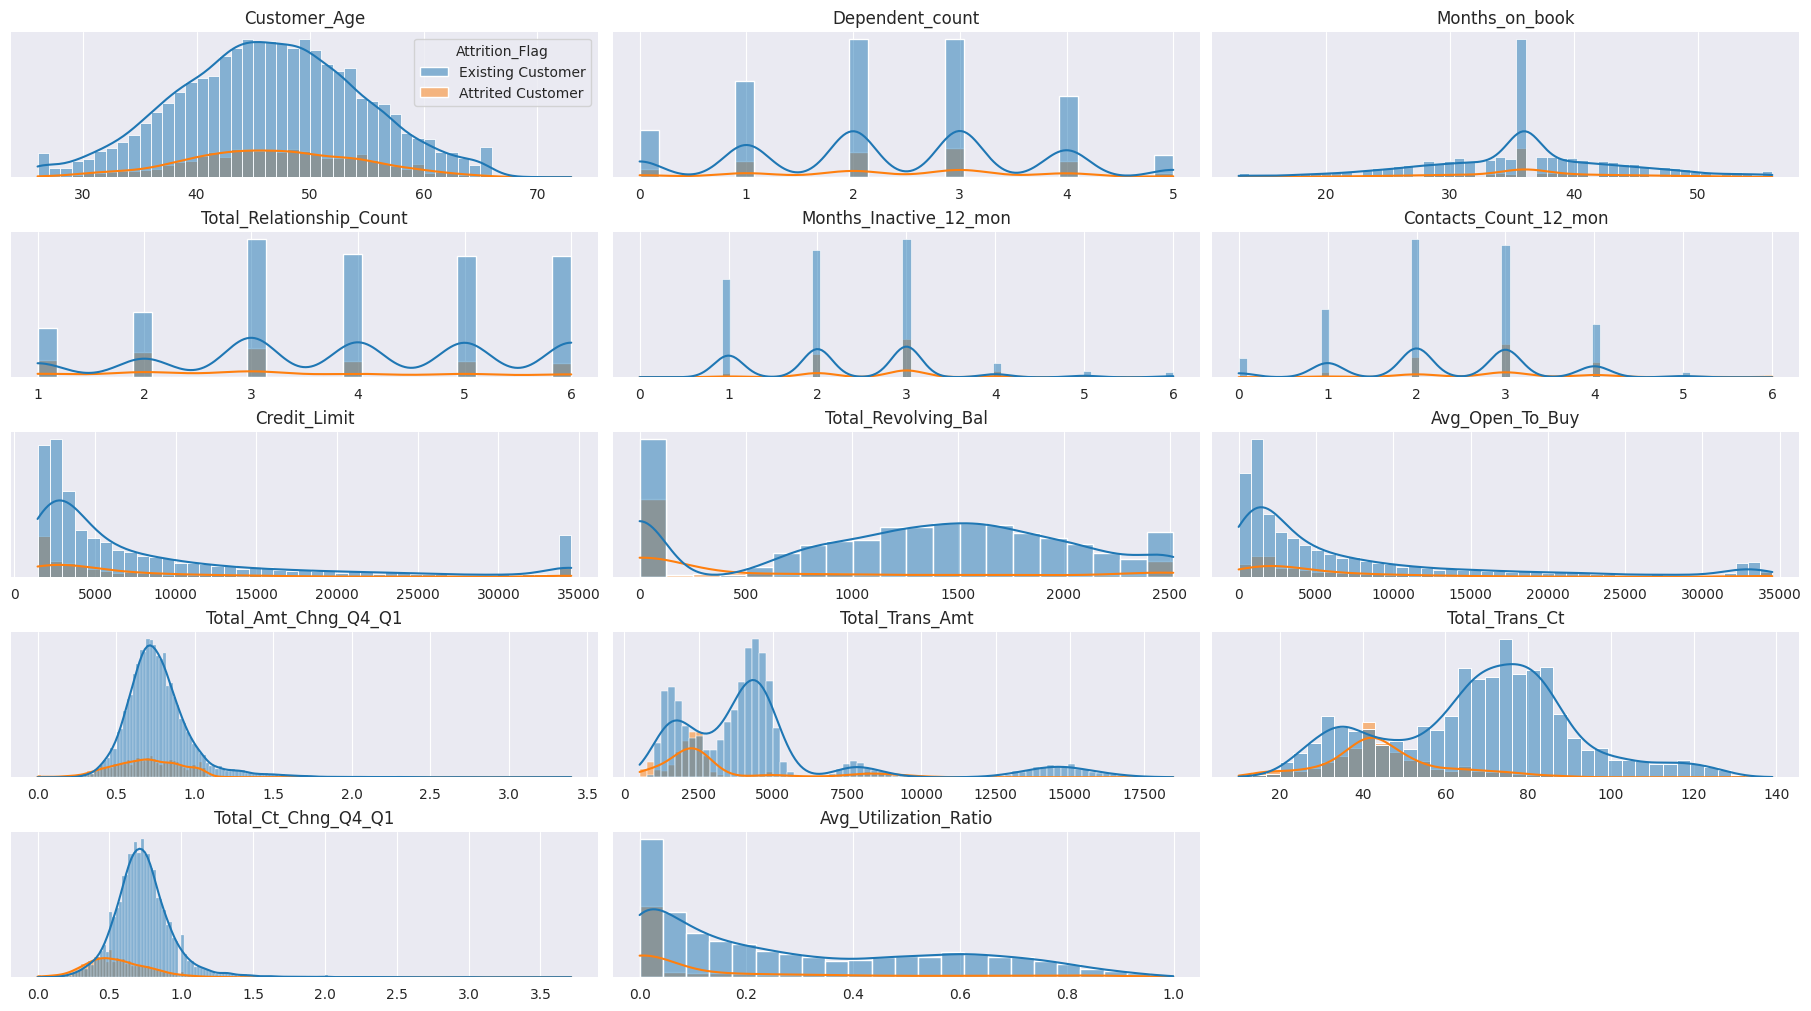

In [ ]:
nrows = 5
ncols = 3

fig, axes = plt.subplots(nrows, ncols, layout = 'constrained', figsize = (18, 10))
# fig.tight_layout()

index = 0

for i in range(0, nrows):
  for j in range(0, ncols):
    try:
      name = num_cols[index]
      
      if index == 0:
        sns.histplot(data = data, x = name, hue = "Attrition_Flag", legend = True, kde = True, ax = axes[i, j])
      else:
        sns.histplot(data = data, x = name, hue = "Attrition_Flag", legend = False, kde = True, ax = axes[i, j])

      # Annotate
      axes[i, j].set_title(name)
      axes[i, j].set(xlabel = None, ylabel = None)
      axes[i, j].spines['top'].set_visible(False)
      axes[i, j].spines['right'].set_visible(False)
      axes[i, j].spines['bottom'].set_visible(False)
      axes[i, j].spines['left'].set_visible(False)
      axes[i, j].set_yticks([], [])

      index += 1
    except:
      break

axes[-1, -1].axis("off")

plt.savefig("/Mối quan hệ giữa thuộc tính số với target.png")
plt.show()

- **Nhận xét**:
  - Hầu hết thuộc tính số đều có phân phối gần giống nhau về xu hướng cho cả 2 lớp khách hàng. Tuy nhiên, có 1 và thuộc tính nhóm nhận thấy điều đặc biệt:
    - `Total_Trans_Amt`: Nhóm khách hàng hiện hữu (EC - Existing Customer - màu xanh) cho ta thấy có 4 phân khúc khách hàng. Còn nhóm khách hàng rời đi (AC - Attrited Customer - màu cam) tập trung ở phân khúc trung bình thấp trong tổng số tiền giao dịch so với nhóm EC. 

- Ta hãy xem thử góc nhìn về điểm dữ liệu.

<Axes: xlabel='Customer_Age', ylabel='Total_Amt_Chng_Q4_Q1'>

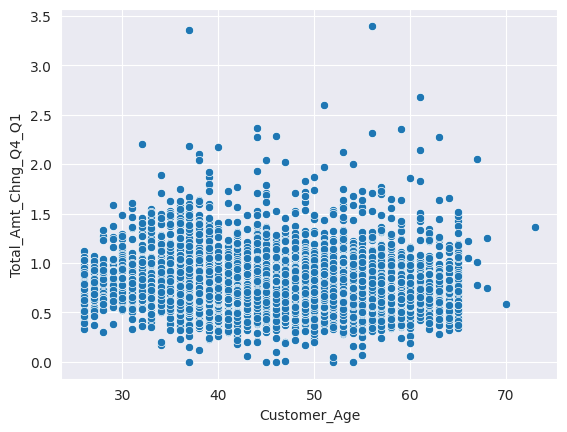

In [ ]:
sns.scatterplot(data, x = "Customer_Age", y = "Total_Amt_Chng_Q4_Q1")

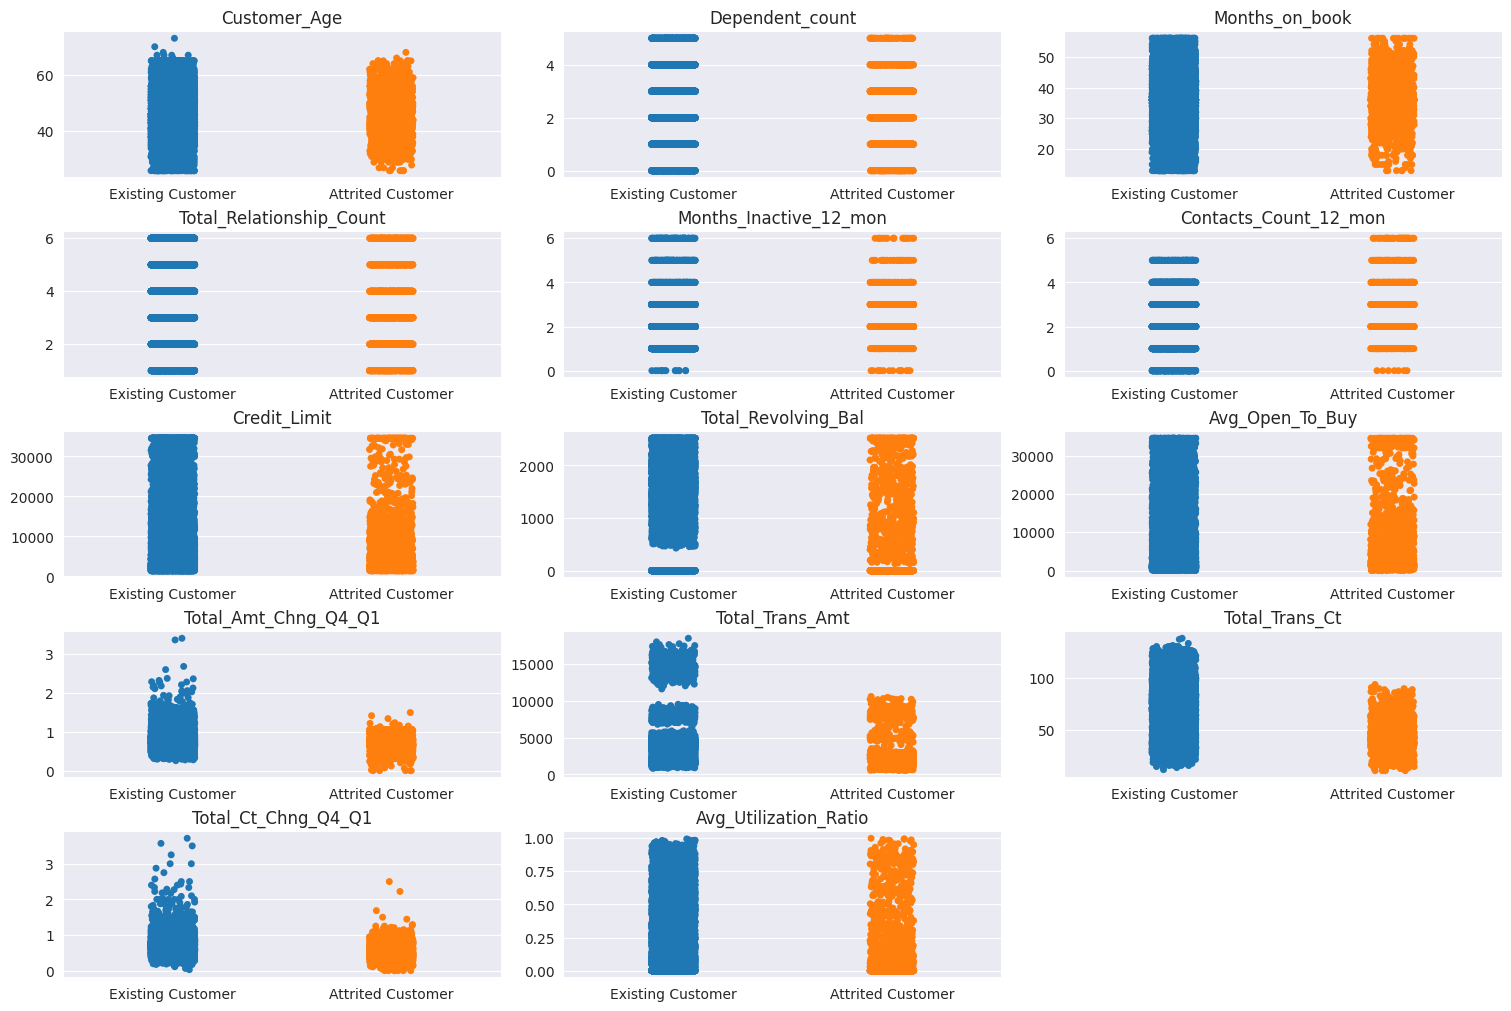

In [ ]:
nrows = 5
ncols = 3

fig, axes = plt.subplots(nrows, ncols, layout = 'constrained', figsize = (15, 10))
# fig.tight_layout()

index = 0

for i in range(0, nrows):
  for j in range(0, ncols):
    try:
      name = num_cols[index]
      
      # Bar plot
      sns.stripplot(data = data, x = 'Attrition_Flag', y = name, ax = axes[i, j], hue = 'Attrition_Flag', legend = False)

      # Annotate
      axes[i, j].set_title(name)
      axes[i, j].set(xlabel = None, ylabel = None)
      axes[i, j].spines['top'].set_visible(False)
      axes[i, j].spines['right'].set_visible(False)
      axes[i, j].spines['bottom'].set_visible(False)
      axes[i, j].spines['left'].set_visible(False)
      # axes[i, j].set_yticks([], [])

      index += 1
    except:
      break

axes[-1, -1].axis("off")

plt.savefig("/Mối quan hệ giữa thuộc tính số với biến target_điểm dữ liệu.png")

plt.show()

- **Nhận xét**:
  - Các outlier thường xuất hiện ở `Existing Customer`.
  - Có những thuộc tính số cho ta thấy rõ được sự phân biệt giữa `Existing Customer` và `Attrited Customer` như:
    - `Total_Trans_Amt`:
      - Ở `Existing Customer`, các khách hàng được chia thành 3 nhóm riêng biệt (thay vì 4 nhóm dưới góc nhìn phân phối như phía trên).
      - Trong khi ở `Attrited Customer` cũng đang cho thấy xu hướng tương tự.
      - Tổng giá trị giao dịch của `Attrited Customer` nằm từ mức trung bình trở xuống, còn `Existing Customer` thì có những khách hàng mà tổng giá trị giao dịch nằm ở mức cao (trên 11000) mà AC không có.
    - `Total_Trans_Ct`.
    - `Total_Revolving_Bal`.
    - Những thuộc tính này sẽ được chọn cho mô hình.

##### Tương quan giữa các thuộc tính số

<ipython-input-19-4aa3c47024ed>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


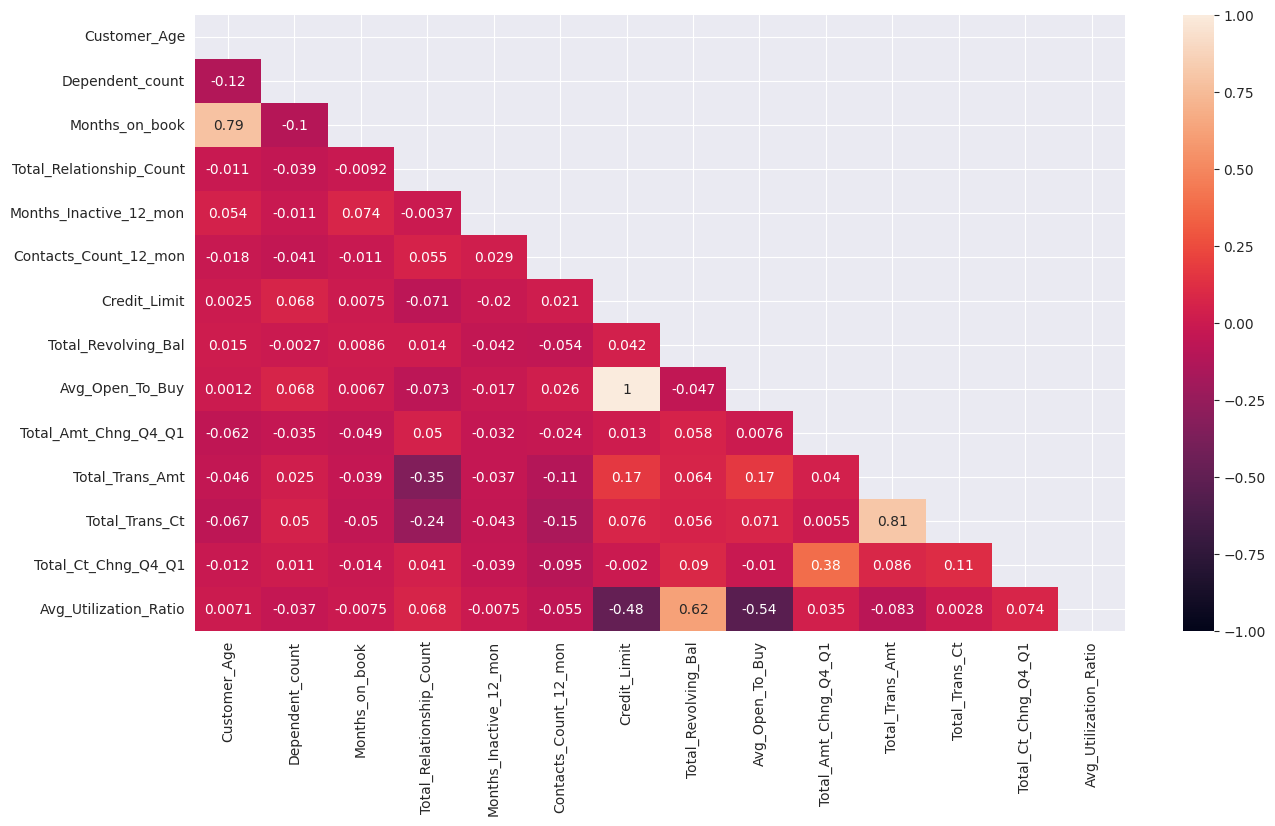

In [ ]:
corr = data.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(15, 8))

sns.heatmap(corr, mask = mask, vmin = -1, vmax = 1, annot = True)

plt.savefig("/Mối tương quan giữa các thuộc tính.png")

plt.show()

- **Nhận xét**:
  - Tương quan dương:
    - Thuộc tính `Credit_Limit` và `Avg_Open_To_Buy` có hệ số tương quan là 1. Ta có thể xem xét xóa 1 trong 2 thuộc tính này ở bước tiền xử lý.
    - Còn có các cặp thuộc tính khác có tương quan mạnh như `Total_Trans_Ct - Total_Trans_Ct - 0.81` và `Months_on_book - Customer_Age - 0.79`.
  - Tương quan âm:
    - Không có cặp thuộc tính nào có tương quan âm mạnh, giá trị nhỏ nhất là -0.54.

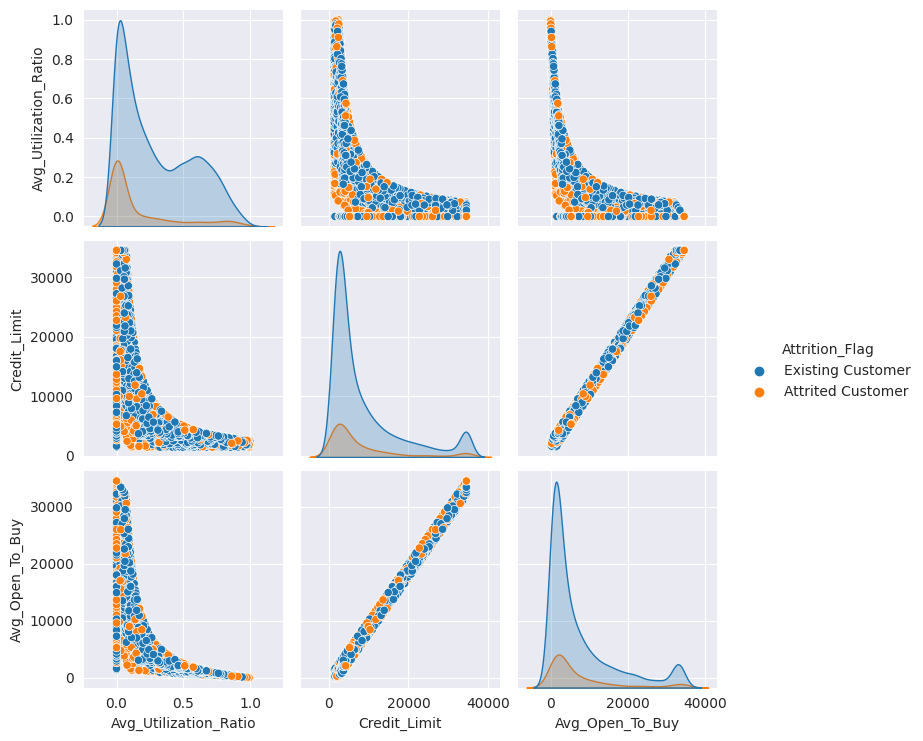

In [ ]:
sns.pairplot(data = data[["Avg_Utilization_Ratio", "Credit_Limit", "Avg_Open_To_Buy", "Attrition_Flag"]], hue = "Attrition_Flag")

plt.savefig("/Các mối tương quan đặc biệt.png")

plt.show()

- **Nhận xét**:
  - Biểu đồ scatter của 2 cặp thuộc tính `Avg_Utilization_Ratio - Credit_Limit` và `Avg_Utilization_Ratio - Avg_Open_To_Buy` cho thấy mối tương quan phi tuyến giữa các thuộc tính khi chúng có hình dạng của hàm mũ.

In [ ]:
# # initialise mine alogithm with default parameters
# mine = MINE(alpha=0.6, c=15) 
# scaler = MinMaxScaler()

# ## write function to compare these variables and give association metric for each
# def compare_stats(x,y):    
#     results= dict()
    
#     results['Pearson\'s R'] = stats.pearsonr(x,y)[0] #returns both Pearson's coefficient and p-value, keep the first value which is the R coefficient
#     results['Spearman'] = stats.spearmanr(x,y) [0]
#     mine.compute_score(x,y) 
#     results['MIC'] = mine.mic() 
#     results['Cosine Similarity'] = 1 - distance.cosine(x,y)  
    
#     return pd.Series(results)

In [ ]:
# x = scaler.fit_transform(data["Avg_Utilization_Ratio"].to_numpy().reshape(-1, 1))
# y = scaler.fit_transform(data["Credit_Limit"].to_numpy().reshape(-1, 1))

# x = [i[0] for i in x]
# y = [i[0] for i in y]

# compare_stats(x,y)

In [ ]:
# x = scaler.fit_transform(data["Avg_Utilization_Ratio"].to_numpy().reshape(-1, 1))
# y = scaler.fit_transform(data["Avg_Open_To_Buy"].to_numpy().reshape(-1, 1))

# x = [i[0] for i in x]
# y = [i[0] for i in y]

# compare_stats(x,y)

##### Dữ liệu bị lệch

###### Kiểm tra

- Nhóm tính toán độ lệch của từng thuộc tính bằng:
  - Hàm `scipy.stats.skewtest()`: Hàm sẽ kiểm định giả thuyết H0 rằng độ lệch của dữ liệu đầu vào bằng với độ lệch của phân phối chuẩn (tức là 0). Nhóm chọn threshold cho pvalue là 0.05 để bác bỏ hoặc chấp nhận giả thuyết H0.

In [ ]:
skew_df = pd.DataFrame(data.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: stats.skew(data[feature]))
skew_df['pvalue'] = skew_df['Feature'].apply(lambda feature: stats.skewtest(data[feature])[1])
skew_df['Skewed'] = skew_df['pvalue'].apply(lambda x: True if x <= 0.5 else False)

skew_df = skew_df.sort_values(by = "pvalue", ascending = False).reset_index(drop = True)
skew_df

,Feature,Skew,pvalue,Skewed
0,Contacts_Count_12_mon,0.011004,6.509805e-01,False
1,Dependent_count,-0.020822,3.920012e-01,True
2,Customer_Age,-0.033600,1.672696e-01,True
3,Months_on_book,-0.106550,1.252019e-05,True
4,Total_Revolving_Bal,-0.148815,1.164715e-09,True
5,Total_Trans_Ct,0.153650,3.374899e-10,True
6,Total_Relationship_Count,-0.162428,3.248726e-11,True
7,Months_Inactive_12_mon,0.632967,1.032312e-126,True
8,Avg_Utilization_Ratio,0.717902,2.505095e-156,True
9,Credit_Limit,1.666479,0.000000e+00,True


- **Nhận xét**:
  - Ta thấy kết quả cho ra phù hợp với hình dạng của histogram ở phần trước. Chỉ có 1 thuộc tính `Contacts_Count_12_mon` là không lệch, trong khi các thuộc tính còn lại đều bị lệch.

- Tiếp theo nhóm đi tìm phương pháp tìm nhất để xử lý lệch cho mỗi thuộc tính, có 3 phương pháp chính mà nhóm quan tâm là: `Lograit`, `Square Root` và `BoxCox`. Khi đã có được phương pháp tốt nhất, nhóm bắt đầu trực quan dữ liệu trước và sau khi đã xử lý lệch.

###### Phương pháp xử lý

In [ ]:
def closest(lst, K = 0):
     
    return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]

def get_best_method(df_):
  temp = df_.copy()
  methods = []

  for i in range(0, temp.shape[0]):
    row = np.array(temp.iloc[i].values)

    closest_zero_index = np.where(row == closest(row))[0][0]
    methods.append(closest_zero_index)

  return methods

In [ ]:
df_temp = data.copy()[skew_df.query("Skewed == True")['Feature'].values]

numeric_columns = df_temp.select_dtypes(np.number).columns

original_skew = {}
logarit = {}
square_root = {}
boxcox = {}

for column in numeric_columns:
  temp = df_temp[column]

  original_skew[column] = stats.skew(temp)
  logarit[column] = np.log1p(temp).skew()
  square_root[column] = np.sqrt(temp).skew()
  boxcox[column] = pd.Series(stats.boxcox(0.0001 + temp)[0]).skew()

df = pd.DataFrame({
    "Original Skew": pd.Series(original_skew),
    "Logarit": pd.Series(logarit),
    "Square Root": pd.Series(square_root),
    "BoxCox": pd.Series(boxcox)
}, index = numeric_columns)

df['Best Method'] = get_best_method(df)
df['Best Method'] = df['Best Method'].map({
    0: "No Transformation",
    1: "Logarit",
    2: "Square Root",
    3: "BoxCox"
})

df = df.sort_values(by = "Best Method", ascending = True)

df

,Original Skew,Logarit,Square Root,BoxCox,Best Method
Customer_Age,-0.033600,-0.507573,-0.269084,-0.018700,BoxCox
Months_on_book,-0.106550,-1.044301,-0.562552,0.025987,BoxCox
Total_Trans_Ct,0.153650,-0.746699,-0.287621,-0.061269,BoxCox
Months_Inactive_12_mon,0.632967,-0.278184,-0.177745,-0.004360,BoxCox
Credit_Limit,1.666479,0.457303,1.087989,0.102921,BoxCox
Avg_Open_To_Buy,1.661450,-0.095298,0.940570,-0.009088,BoxCox
Total_Amt_Chng_Q4_Q1,1.731807,0.648440,0.389287,0.304354,BoxCox
Total_Trans_Amt,2.040701,0.262780,1.216134,0.002919,BoxCox
Dependent_count,-0.020822,-0.955958,-1.177588,-0.938865,No Transformation
Total_Revolving_Bal,-0.148815,-1.148306,-0.783322,-1.090869,No Transformation


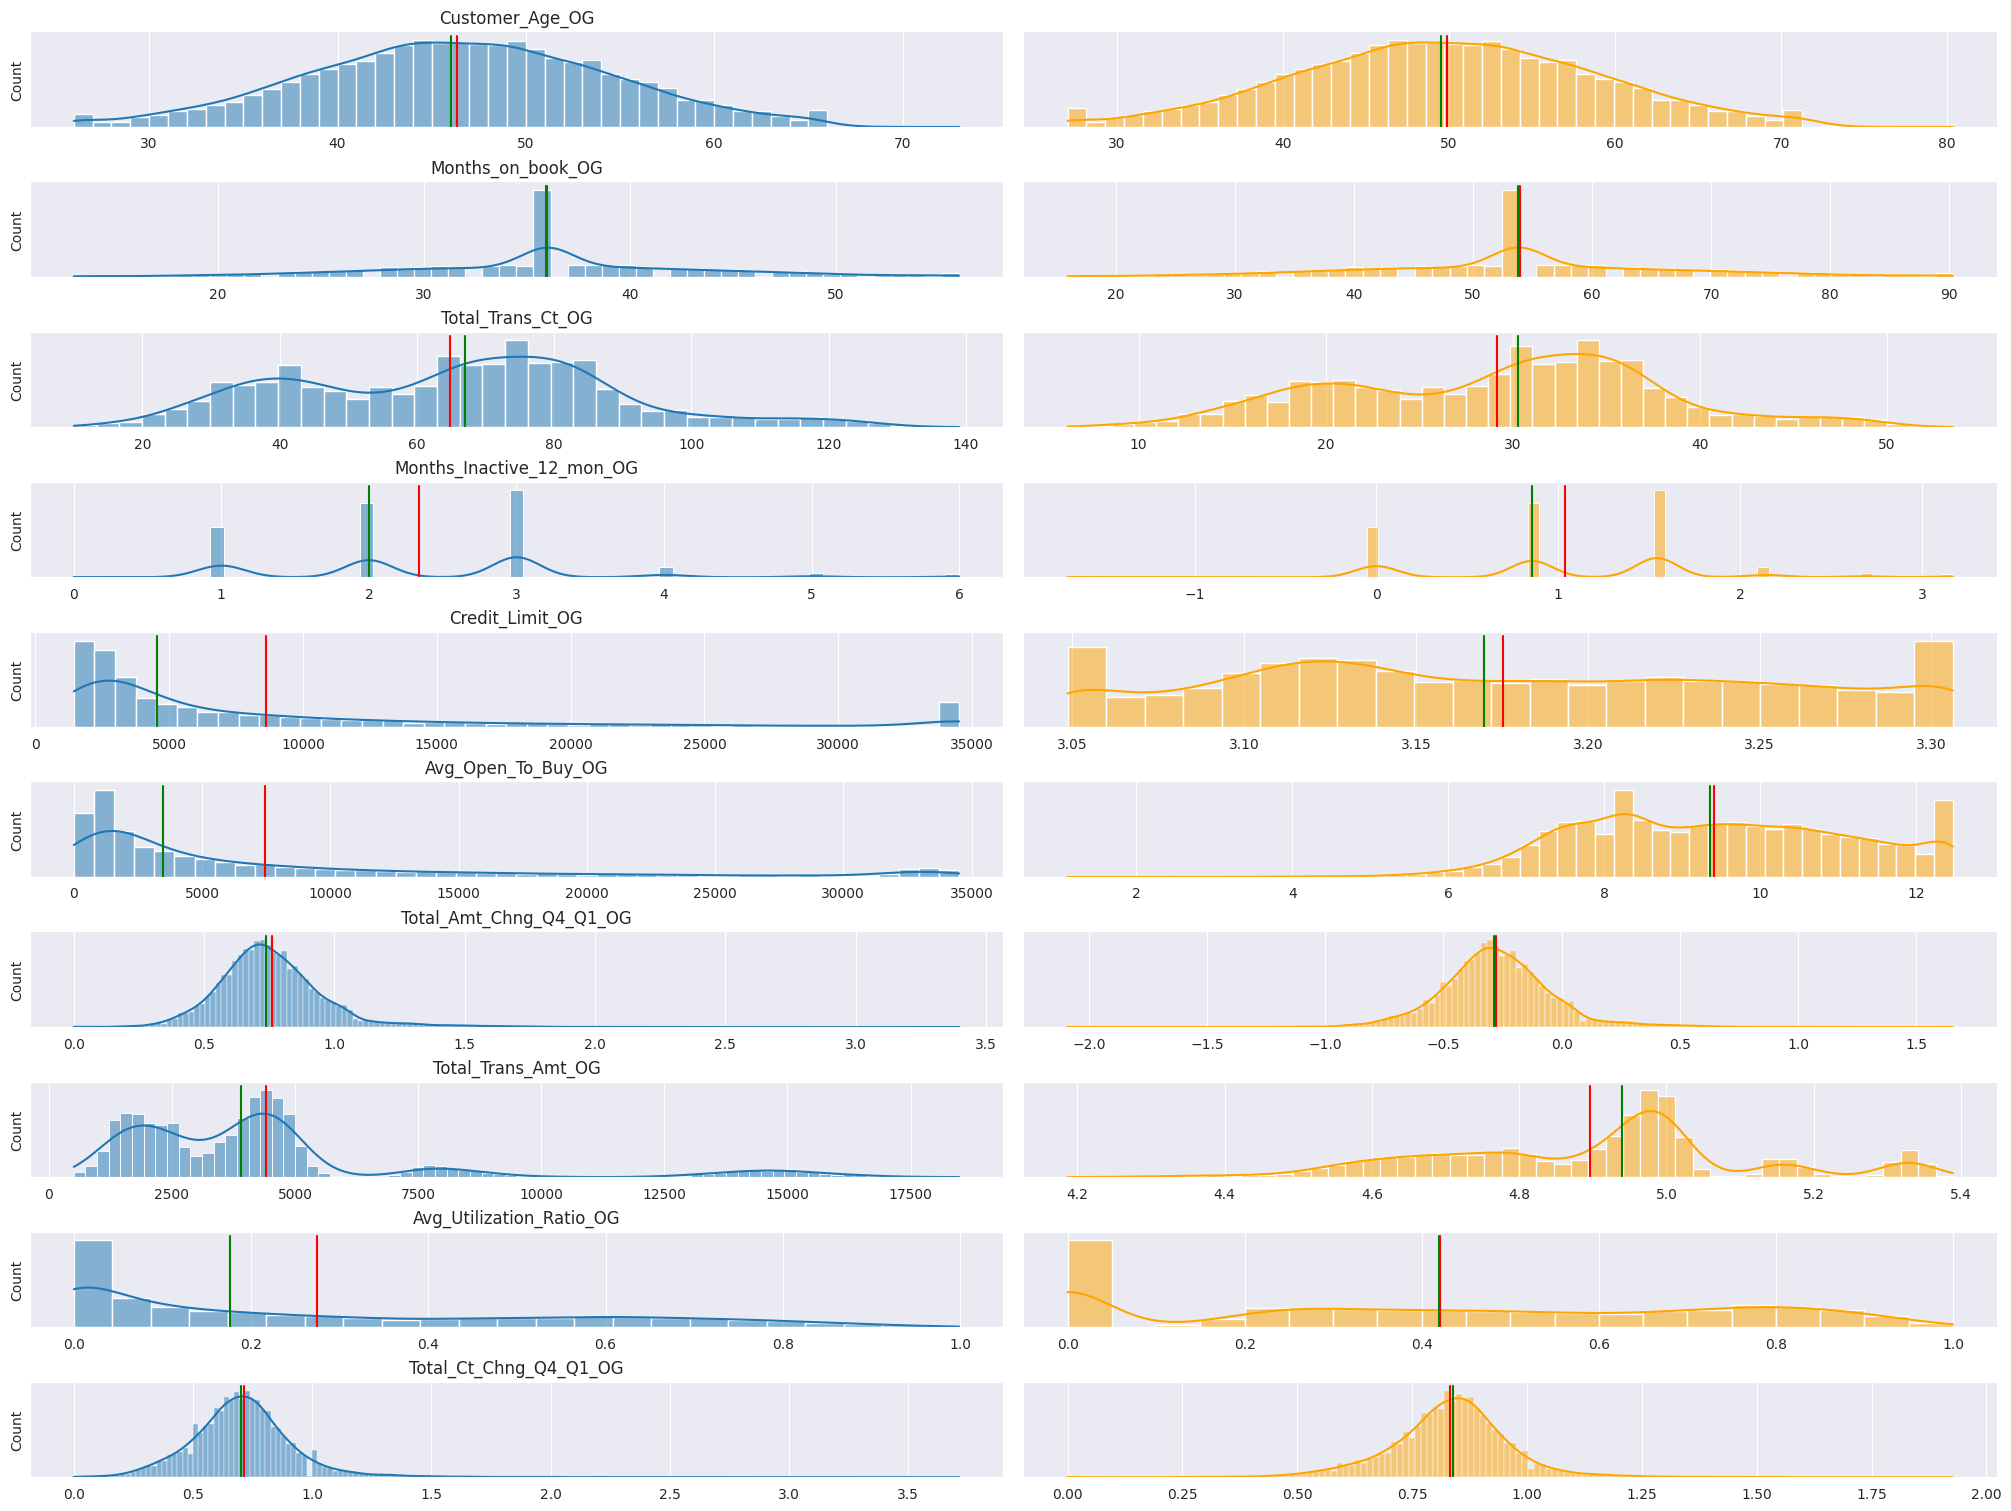

In [ ]:
temp_data = data[df[df["Best Method"] != "No Transformation"].index].copy()
temp_cols = temp_data.columns

# PLOT HISTOGRAM
nrows = 10
ncols = 2

fig, axes = plt.subplots(nrows, ncols, layout = 'constrained', figsize = (20, 15))
# fig.tight_layout()

index = 0

for i in range(0, nrows):
  for j in range(0, ncols):
    try:
      name = temp_cols[index]

      if j == 0:
        # Plot histogram
        sns.histplot(temp_data[name], ax = axes[i, j], kde = True)
        max_ylim = axes[i, j].get_ylim()[1]

        # Plot average line
        avg = temp_data[name].mean()
        axes[i, j].plot([avg]*2, [0, max_ylim], label = 'Average', color = 'red')

        # Plot median line
        med = temp_data[name].median()
        axes[i, j].plot([med]*2, [0, max_ylim], label = 'Median', color = 'green')

        axes[i, j].set_title(name + "_OG")
        axes[i, j].set(xlabel = None)

      else:
        method = df.loc[name]["Best Method"]
        temp_ = pd.Series(stats.boxcox(0.0001 + temp_data[name])[0]) if method == "BoxCox" else np.sqrt(temp_data[name])
        
        sns.histplot(temp_, ax = axes[i, j], kde = True, color = "orange")

        max_ylim = axes[i, j].get_ylim()[1]

        # Plot average line
        avg = np.mean(temp_)
        axes[i, j].plot([avg]*2, [0, max_ylim], label = 'Average', color = 'red')

        # Plot median line
        med = np.median(temp_)
        axes[i, j].plot([med]*2, [0, max_ylim], label = 'Median', color = 'green')
        
        axes[i, j].set(xlabel = None, ylabel = None)

      # Annotate
      # axes[i, j].set_title(name + "_NT")
      # axes[i, j].spines['top'].set_visible(False)
      # axes[i, j].spines['right'].set_visible(False)
      # axes[i, j].spines['bottom'].set_visible(False)
      # axes[i, j].spines['left'].set_visible(False)
      axes[i, j].set_yticks([], [])

    except:
      print(name)
      break
  index += 1

plt.savefig("/Dữ liệu lệch.png")

plt.show()

- **Nhận xét**:
  - Sau khi biến đổi, thuộc tính `Total_Cnt_Chng_Q4_Q1` và `Total_Amt_Chng_Q4_Q1` cho hình dạng phân phối chuẩn tốt hơn trước khi biến đổi.
  - Ở các thuộc tính `Credit_Limit`, `Avg_Open_To_Buy`, `Total_Trans_Amt` và `Avg_Utilization_Ratio` hình dạng phân phối thay đổi sau khi biến đổi.
  - Sau khi biến đổi, thuộc tính `Avg_Utilization_Ratio` có xu hướng bị phân thành 2 nhóm, điểm dữ liệu có giá trị 0 và khác 0. Do phương pháp biến đổi của thuộc tính này là Square Root nên những dữ liệu giá trị 0 vẫn được giữ nguyên trong khi phần còn lại bị thay đổi. (Xem hình phía dưới) 
  - Ta thấy sau khi biến đổi, giá trị trung bình (màu đỏ) và trung vị (màu xanh) đã tiến lại gần nhau hơn ở tất cả thuộc tính. Duy chỉ có thuộc tính `Total_Trans_Amt` thì 2 giá trị này rời xa nhau nhưng không đáng kể.

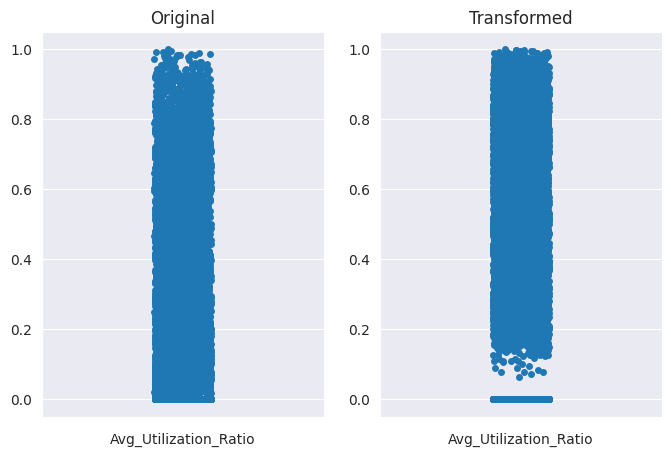

In [ ]:
plt.figure(figsize=(8, 5))
name = "Avg_Utilization_Ratio"

plt.subplot(1,2,1)
sns.stripplot(data[name])
plt.title('Original')
plt.xlabel(name)
plt.ylabel(None)

plt.subplot(1,2,2)
sns.stripplot(np.sqrt(data[name]))
plt.title('Transformed')
plt.xlabel(name)
plt.ylabel(None)

plt.savefig("/Trước và sau khi biến đổi lệch.png")

plt.show()

### EDA

##### Mối quan hệ giữa giá trị `Unknown` và `Divorced` của thuộc tính `Marrital_Status`

In [ ]:
data1 = data[data["Marital_Status"].isin(["Unknown", "Divorced"])].copy()

data1.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
708790833,Existing Customer,42,M,5,Uneducated,Unknown,$120K +,Blue,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
816082233,Existing Customer,35,M,3,Graduate,Unknown,$60K - $80K,Blue,30,5,1,3,8547.0,1666,6881.0,1.163,1311,33,2.000,0.195
714885258,Existing Customer,44,M,4,Unknown,Unknown,$80K - $120K,Blue,37,5,1,2,4234.0,972,3262.0,1.707,1348,27,1.700,0.230


- Số lượng

In [ ]:
data1["Marital_Status"].value_counts()

Unknown     749
Divorced    748
Name: Marital_Status, dtype: int64

- Phân phối của 2 nhóm khách hàng này qua các thuộc tính số

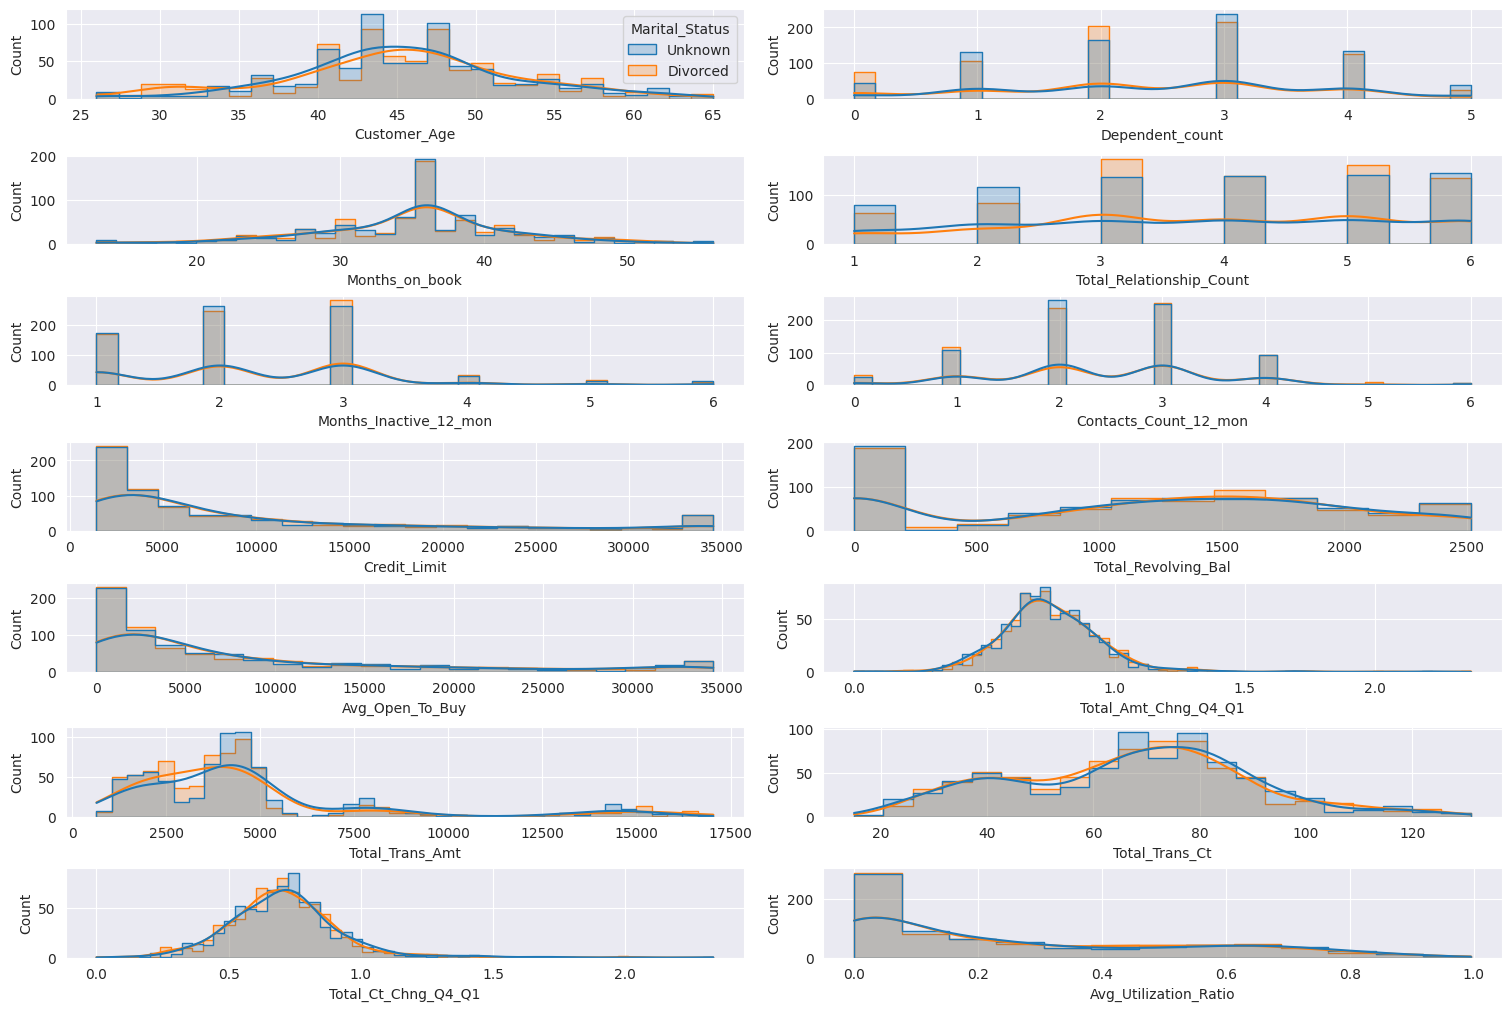

In [ ]:
nrows = 7
ncols = 2

fig, ax = plt.subplots(nrows, ncols, layout = 'constrained', figsize = (15, 10))

cols = data1.select_dtypes(np.number).columns
index = 0

for i in range(nrows):
  for j in range(ncols):
    feature = cols[index]

    if index == 0:
      sns.histplot(data = data1, x = feature, hue = "Marital_Status", kde = True, ax = ax[i, j], element = "step")
    else:
      sns.histplot(data = data1, x = feature, hue = "Marital_Status", kde = True, ax = ax[i, j], element = "step", legend = False)

    index += 1

plt.savefig("/Hành vi của nhóm Unknown và Divorced.png")

plt.show()

- 2 nhóm khách hàng `Unknown` và `Divorced` có phân phối ở những thuộc tính số tương đồng nhau.

- Ta đi kiểm chứng tính đồng nhất giữa 2 nhóm khách hàng này bằng kiểm dịnh Chi Square

In [ ]:
data2 = data1.copy()

- Bước 1: Đặt giả thuyết

  - `H0`: Dân số của 2 nhóm này đến từ 1 phân phối. "*The null hypothesis for this test states that the populations of the two data sets come from the same distribution.*"
  - `H1`: Dân số của 2 nhóm này đến từ 2 phân phối khác nhau.

- Bước 2: Phân loại các giá trị của thuộc tính số vào các bin. Số lượng bin được chọn là 20.

In [ ]:
for feature in data2.select_dtypes(np.number).columns:
  data2[feature] = pd.qcut(data2[feature], q = 20, duplicates = 'drop')

  data2[feature] = data2[feature].astype(object)

data2 = data2.reset_index()

In [ ]:
data2.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,769911858,Existing Customer,"(39.0, 40.0]",F,"(3.0, 4.0]",High School,Unknown,Less than $40K,Blue,"(33.0, 34.0]",...,"(3.0, 4.0]","(-0.001, 1.0]","(3279.6, 3667.0]","(2222.0, 2517.0]","(757.9, 935.4]","(1.044, 2.368]","(646.999, 1352.0]","(14.999, 30.0]","(1.038, 2.333]","(0.678, 0.763]"
1,818906208,Existing Customer,"(25.999, 32.0]",M,"(-0.001, 1.0]",High School,Unknown,$60K - $80K,Silver,"(25.0, 28.0]",...,"(0.999, 2.0]","(1.0, 2.0]","(25514.8, 34516.0]","(1376.8, 1491.0]","(24160.4, 32335.2]","(1.044, 2.368]","(1352.0, 1596.4]","(30.0, 36.0]","(0.702, 0.722]","(0.044, 0.0656]"
2,708790833,Existing Customer,"(41.0, 42.0]",M,"(4.0, 5.0]",Uneducated,Unknown,$120K +,Blue,"(30.0, 31.0]",...,"(2.0, 3.0]","(1.0, 2.0]","(6029.6, 7232.8]","(1376.8, 1491.0]","(4859.4, 6137.4]","(0.806, 0.832]","(646.999, 1352.0]","(40.0, 44.0]","(0.658, 0.68]","(0.2, 0.245]"


- Bước 3: Sử dụng Chi-Square để kiểm định tính đồng nhất của hai nhóm trên mỗi thuộc tính còn lại.

In [ ]:
def check_homogeneity(feature, alpha = 0.05):
  if feature not in ["Marital_Status", "CLIENTNUM"]:
    a = pd.pivot_table(
      data = data2,
      values = "CLIENTNUM",
      index = feature,
      columns = "Marital_Status",
      aggfunc = "nunique").to_numpy()
  
    stat, p, dof, expected = chi2_contingency(a)

    if p <= alpha:
      # Bác bỏ H0
      return True
    else:
      # Chấp nhận H0
      return False
  else:
    return None

In [ ]:
temp = pd.DataFrame({"Feature": data2.columns})
temp["Chi_Square_Homogeneity_Test"] = temp["Feature"].apply(check_homogeneity)

temp.sort_values("Chi_Square_Homogeneity_Test")

,Feature,Chi_Square_Homogeneity_Test
1,Attrition_Flag,False
18,Total_Trans_Ct,False
16,Total_Amt_Chng_Q4_Q1,False
15,Avg_Open_To_Buy,False
14,Total_Revolving_Bal,False
13,Credit_Limit,False
12,Contacts_Count_12_mon,False
19,Total_Ct_Chng_Q4_Q1,False
11,Months_Inactive_12_mon,False
9,Months_on_book,False


- **Nhận xét**:
  - Sau kiểm định, ta thấy đa số thuộc tính đều cho kết quả rằng 2 nhóm này đều có dân số đến từ cùng một phân phối tức là hai nhóm này giống nhau.
  - Khi tiền xử lý, ta có thể gom chung 2 giá trị `Uknown` và `Divorced` về thành một.

In [ ]:
data3 = data1.copy()

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
for i in data3.select_dtypes(object).columns:
  data3[i] = label_encoder.fit_transform(data3[i])

- `Unknown`: 1.
- `Divorced`: 0.

In [ ]:
unknown = data3[data3["Marital_Status"] == 1]

divorced = data3[data3["Marital_Status"] == 0]

In [ ]:
divorced_ = divorced.describe().loc["mean"].to_numpy()

temp = unknown.to_numpy()

dist = [np.linalg.norm(divorced_ - np.array(i)) for i in temp]

<Axes: ylabel='Count'>

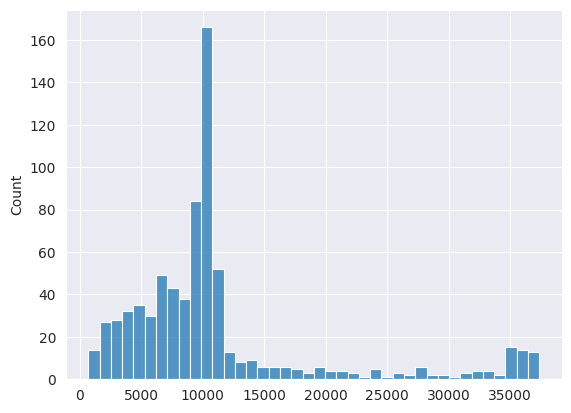

In [ ]:
sns.histplot(dist, bins = "auto")

In [ ]:
divorced_ = divorced.describe().loc["mean"].to_numpy()

unknown_ = unknown.describe().loc["mean"].to_numpy()

In [ ]:
np.linalg.norm(divorced_ - unknown_)

226.25059525437234